In [50]:
# Titanic Survival Analysis: An Exploratory Data Analysis

### Project Overview
#In this notebook, I perform an exploratory data analysis (EDA) on the classic Titanic dataset. The goal is to investigate the data, identify key features, and uncover the factors that most influenced a passenger's chance of survival. This project demonstrates core skills in data cleaning, manipulation, and visualization using pandas, matplotlib, and seaborn.

In [51]:
#Import for Data Analysis & Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Import for Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [52]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Summary of the dataset & Examine Stats
print("\nDataset Information:")
df.info()
df.head()
df.describe().T

#Distribution of categorical data
print("Survival Distribution:\n", df['Survived'].value_counts())
print("Survival Distribution Percentage:\n",df['Survived'].value_counts(normalize=True) * 100)

#Gender Distribution
print("Gender Distribution:\n", df['Sex'].value_counts())

#Pclass Distribution
print("Passenger Class Distribution:\n", df['Pclass'].value_counts())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Survival Distribution:
 Survived
0    549
1    342
Name: count, dtype: int64
Survival Distribution Percentage:
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Gender Distribution:
 Sex
male      57

In [53]:
'''
1. Data Cleaning
The initial inspection showed missing values in `Age`, `Embarked`, and `Cabin`.
- Missing `Age` values will be filled with the median.
- Missing `Embarked` ports will be filled with the most common one (the mode).
- The `Cabin` column is missing too much data and will be dropped.
'''

'\n1. Data Cleaning\nThe initial inspection showed missing values in `Age`, `Embarked`, and `Cabin`.\n- Missing `Age` values will be filled with the median.\n- Missing `Embarked` ports will be filled with the most common one (the mode).\n- The `Cabin` column is missing too much data and will be dropped.\n'

In [54]:
df.drop('Cabin', axis=1, inplace=True)

print("\n Check for Nulls") 
df.isna().sum()

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace = True)
print(f"\n Filled missing 'Age' with median: {median_age}")

most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)
print(f"Filled missing 'Embarked' with mode: {most_frequent_embarked}")

#Check after operations 
df.info() 
df.isna().sum()



 Check for Nulls

 Filled missing 'Age' with median: 28.0
Filled missing 'Embarked' with mode: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


/var/folders/7j/ml4t0dnd22v1_0cr33q3v8t00000gn/T/ipykernel_70469/3330026234.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace = True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
'''
## 2. Exploratory Data Analysis (EDA)
With a clean dataset, I can now dig in and explore the patterns that influenced survival.
'''

'\n## 2. Exploratory Data Analysis (EDA)\nWith a clean dataset, I can now dig in and explore the patterns that influenced survival.\n'

In [56]:
#Feature Engineering Steps 
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#ISAlone for people who just attended by themselves with no other family onboard 
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print(df[['Survived','FamilySize','IsAlone']].head(10))

   Survived  FamilySize  IsAlone
0         0           2        0
1         1           2        0
2         1           1        1
3         1           2        0
4         0           1        1
5         0           1        1
6         0           1        1
7         0           5        0
8         1           3        0
9         1           2        0


<function matplotlib.pyplot.show(close=None, block=None)>

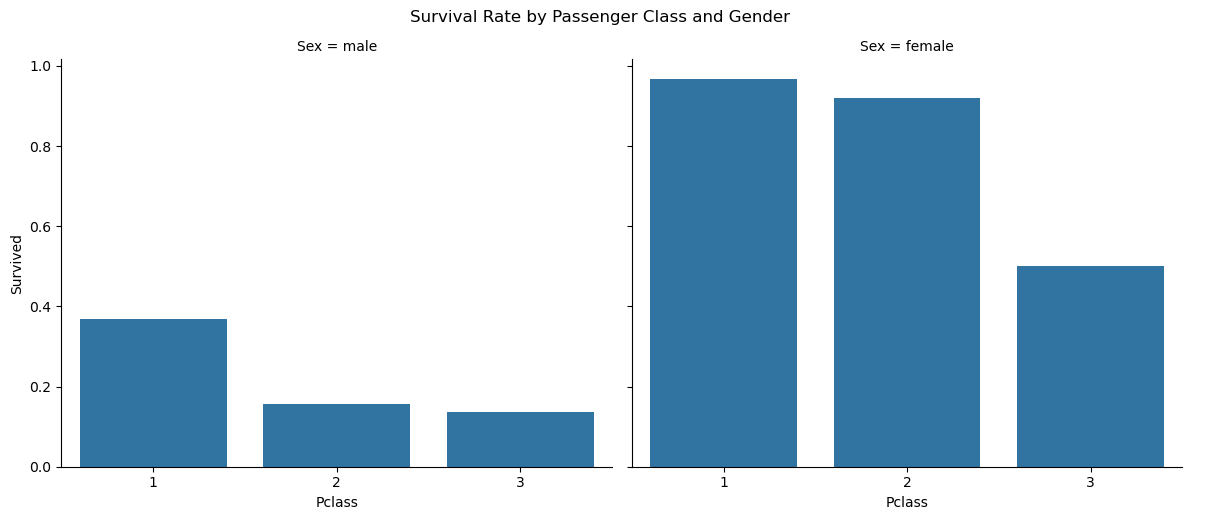

In [57]:
#Survival Rates by Gender and Passenger Class
sns.catplot(x='Pclass', y='Survived', col='Sex', data=df, kind='bar', errorbar=None, height=5, aspect=1.2)
plt.suptitle('Survival Rate by Passenger Class and Gender', y=1.03)
plt.show

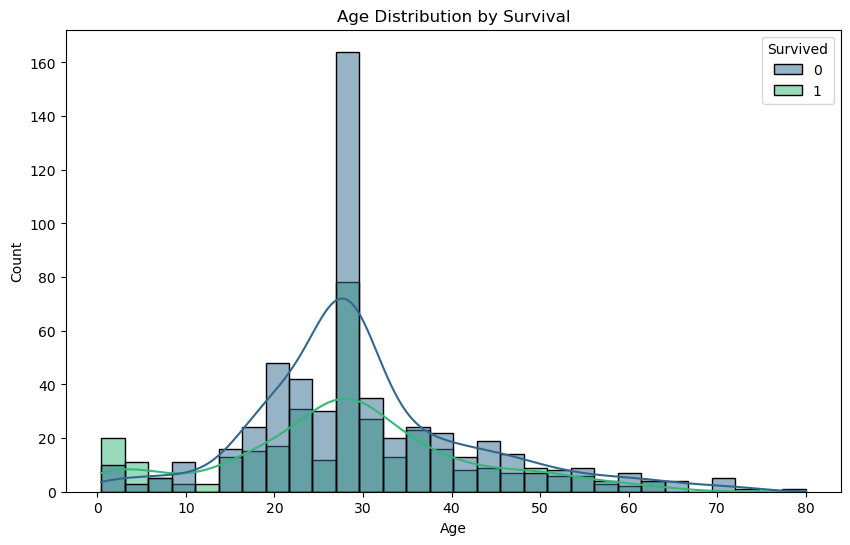

In [58]:
#Survival by Age
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', kde=True, hue='Survived', palette='viridis', bins= 30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

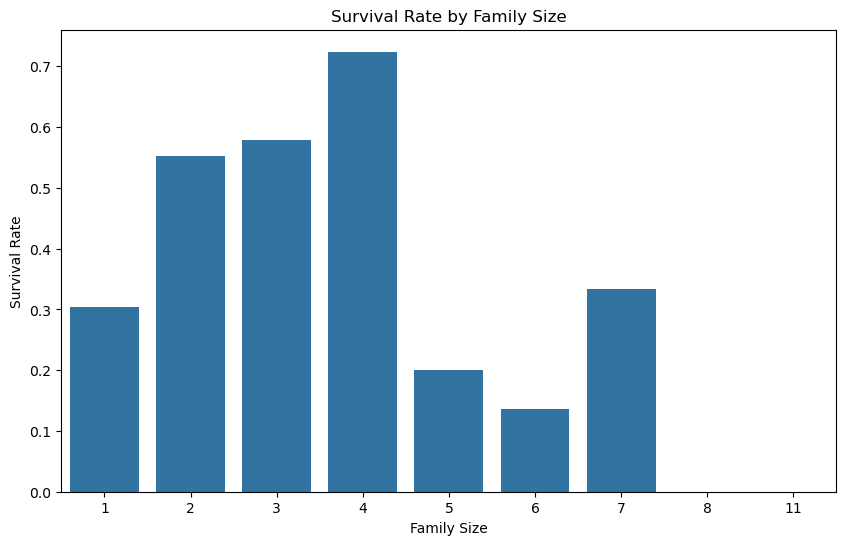

In [59]:
#Survival Based on family size
plt.figure(figsize=(10,6))
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [60]:
'''
3. Preprocessing for Modeling
Based on the EDA, `Pclass`, `Sex`, and `Age` are strong indicators of survival. I'll use these features to build a predictive model. This involves several key steps:

- **Feature and Target Selection:** Defining my `X` (the features the model learns from) and `y` (the target it tries to predict).
- **Encoding:** Converting categorical features like `Sex` ('male', 'female') into a numerical format using one-hot encoding.
- **Train-Test Split:** Splitting the data into a 'training' set for the model to learn from, and a 'testing' set to get an honest measure of its performance.
'''

"\n3. Preprocessing for Modeling\nBased on the EDA, `Pclass`, `Sex`, and `Age` are strong indicators of survival. I'll use these features to build a predictive model. This involves several key steps:\n\n- **Feature and Target Selection:** Defining my `X` (the features the model learns from) and `y` (the target it tries to predict).\n- **Encoding:** Converting categorical features like `Sex` ('male', 'female') into a numerical format using one-hot encoding.\n- **Train-Test Split:** Splitting the data into a 'training' set for the model to learn from, and a 'testing' set to get an honest measure of its performance.\n"

In [61]:
df_encoded = df.copy()

#Here on out is label encoding: Changing text values to numbers for machine learning purposes 
df_encoded['Sex'] = df_encoded['Sex'].map({'male':0, 'female':1})
print("\nSex columns after encoding:\n", df_encoded['Sex'].head())
print("\nUnique values in sex column after encoding:\n", df_encoded['Sex'].unique())


#One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked', 'Pclass'], drop_first= True, dtype=int)
print("\n Dataframe headc after One-Hot Encoding embarked and pclass:\n", df_encoded.head())


Sex columns after encoding:
 0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

Unique values in sex column after encoding:
 [0 1]

 Dataframe headc after One-Hot Encoding embarked and pclass:
    PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare  FamilySize  IsAlone  \
0    0  22.0      1      0         A/5 21171   7.2500           2        0   
1    1  38.0      1      0          PC 17599  71.2833           2        0   
2    1  26.0      0      0  STON/O2. 3101282   7.9250           1        1   
3    1  3

In [62]:
#Defining X and Y- Features and Target
X = df_encoded.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis=1)
y = df_encoded['Survived']

print("Features (X) head:\n", X.head())
print("\n Target (y) head:\n", y.head())
print("\n Shape of X:", X.shape)
print("Shape of y:", y.shape)

#Splitting Data into Training Sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:\n", y_test.shape)

Features (X) head:
    Sex   Age  SibSp  Parch  FamilySize  IsAlone  Embarked_Q  Embarked_S  \
0    0  22.0      1      0           2        0           0           1   
1    1  38.0      1      0           2        0           0           0   
2    1  26.0      0      0           1        1           0           1   
3    1  35.0      1      0           2        0           0           1   
4    0  35.0      0      0           1        1           0           1   

   Pclass_2  Pclass_3  
0         0         1  
1         0         0  
2         0         1  
3         0         0  
4         0         1  

 Target (y) head:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

 Shape of X: (891, 10)
Shape of y: (891,)

Shape of X_train: (712, 10)
Shape of X_test: (179, 10)
Shape of y_train: (712,)
Shape of y_test:
 (179,)


In [63]:
'''
4. Building and Evaluating a Predictive Model
I'll use a **Logistic Regression** model, a reliable choice for this kind of classification problem. I will train it on the `X_train` data and then evaluate its performance on the unseen `X_test` data using several key metrics.
'''

"\n4. Building and Evaluating a Predictive Model\nI'll use a **Logistic Regression** model, a reliable choice for this kind of classification problem. I will train it on the `X_train` data and then evaluate its performance on the unseen `X_test` data using several key metrics.\n"

In [64]:
# Logistic Regression - Used for predicting categorical outcomes. Works by estimating the probability that an instance belongs to a particular class.
model = LogisticRegression(random_state=43, max_iter=200)
model.fit(X_train, y_train)

print("model training complete")
print(f"The trained model is:{model}")

#Making predicitons and Evaluating the model 
y_pred = model.predict(X_test)

print("First 10 actual values from the y_test:\n", y_test.head(10).values) 
print("\n First 10 predicted values from y_pred:\n", y_pred[:10])

y_pred_proba = model.predict_proba(X_test)
print("\nFirst 5 predicted probabilities (for class 0 and class 1):\n", y_pred_proba[:5])

model training complete
The trained model is:LogisticRegression(max_iter=200, random_state=43)
First 10 actual values from the y_test:
 [1 0 0 1 1 1 1 0 1 1]

 First 10 predicted values from y_pred:
 [0 0 0 1 1 1 1 0 1 1]

First 5 predicted probabilities (for class 0 and class 1):
 [[0.85319395 0.14680605]
 [0.75431947 0.24568053]
 [0.88138282 0.11861718]
 [0.0732899  0.9267101 ]
 [0.20128197 0.79871803]]


Accuracy: 0.8045
Precision: 0.7910
Recall: 0.7162
F1-Score: 0.7518

Confusion Matrix:
 [[91 14]
 [21 53]]


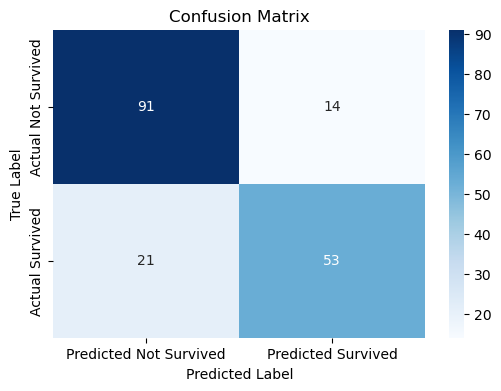

In [65]:
#Further Evaluation of the Model
#Calc Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#Calc Precision 
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

#Calc Recall 
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

#Calc F1
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

#Calc Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.xticks(ticks=[.5,1.5], labels=['Predicted Not Survived', 'Predicted Survived'])
plt.yticks(ticks=[.5,1.5], labels=['Actual Not Survived', 'Actual Survived'])

plt.show()

In [66]:
#Feature Scaling
#Min-Max Scaling - Scales values to a fixed range, usually 0 to 1 
#Standardization - Scales values such that the mean of the observed values is 0 and the standard deviation is 1

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

print("Original X_train first 5 rows (before scaling):\n", X_train.head())
print("\nScaled X_train first 5 rows (after scaling):\n", X_train_scaled[:5])
print("\nScaled X_test first 5 rows (after scaling):\n", X_test_scaled[:5])

Original X_train first 5 rows (before scaling):
      Sex   Age  SibSp  Parch  FamilySize  IsAlone  Embarked_Q  Embarked_S  \
331    0  45.5      0      0           1        1           0           1   
733    0  23.0      0      0           1        1           0           1   
382    0  32.0      0      0           1        1           0           1   
704    0  26.0      1      0           2        0           0           1   
813    1   6.0      4      2           7        0           0           1   

     Pclass_2  Pclass_3  
331         0         0  
733         1         0  
382         0         1  
704         0         1  
813         0         1  

Scaled X_train first 5 rows (after scaling):
 [[-0.7243102   1.25364106 -0.47072241 -0.47934164 -0.55466613  0.81220297
  -0.30335547  0.59248936 -0.51880845 -1.1258401 ]
 [-0.7243102  -0.47728355 -0.47072241 -0.47934164 -0.55466613  0.81220297
  -0.30335547  0.59248936  1.92749365 -1.1258401 ]
 [-0.7243102   0.21508629 -0.470722

Model training complete with scaled data!

First 10 actual values from y_test:
 [1 0 0 1 1 1 1 0 1 1]

First 10 predicted values(scaled model):
 [0 0 0 1 1 1 1 0 1 1]

-- Performance with Scaled Data ---
Accuracy (Scaled Data): 0.7989
Precision (Scaled Data): 0.7794
Recall (Scaled Data): 0.7162
F1-Score (Scaled Data): 0.7465

Confusion Matrix (Scaled Data):
 [[90 15]
 [21 53]]


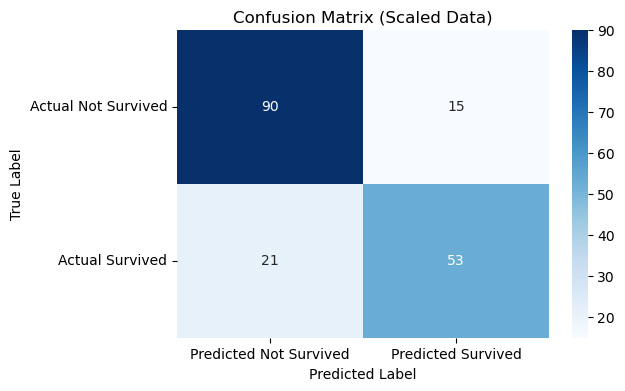

In [67]:
model_scaled = LogisticRegression(random_state=42, max_iter=200)
model_scaled.fit(X_train_scaled, y_train) 
print("Model training complete with scaled data!") 

y_pred_scaled = model_scaled.predict(X_test_scaled) 
print("\nFirst 10 actual values from y_test:\n", y_test.head(10).values)
print("\nFirst 10 predicted values(scaled model):\n", y_pred_scaled[:10])

print("\n-- Performance with Scaled Data ---")

accuracy_scaled = accuracy_score(y_test, y_pred_scaled) 
print(f"Accuracy (Scaled Data): {accuracy_scaled:.4f}")

precision_scaled = precision_score(y_test, y_pred_scaled)
print(f"Precision (Scaled Data): {precision_scaled:.4f}")

recall_scaled = recall_score(y_test, y_pred_scaled) 
print(f"Recall (Scaled Data): {recall_scaled:.4f}")

f1_scaled = f1_score(y_test, y_pred_scaled)
print(f"F1-Score (Scaled Data): {f1_scaled:.4f}")

conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
print("\nConfusion Matrix (Scaled Data):\n", conf_matrix_scaled)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap = 'Blues') 
plt.xlabel('Predicted Label') 
plt.ylabel('True Label') 
plt.title('Confusion Matrix (Scaled Data)') 
plt.xticks(ticks=[.5, 1.5], labels=['Predicted Not Survived', 'Predicted Survived'])
plt.yticks(ticks=[.5, 1.5], labels=['Actual Not Survived', 'Actual Survived'], rotation=0)
plt.show()

In [68]:
'''
5. Conclusion
The exploratory analysis confirmed that passenger class and gender were the strongest predictors of survival on the Titanic.
Based on these insights, a logistic regression model was trained that can predict passenger survival with an **accuracy of approximately 81%**. The classification report and confusion matrix provide a more detailed look at its performance, showing it is more effective at correctly identifying passengers who did not survive (higher precision and recall for class 0) than those who did. This project successfully demonstrates a full data science workflow, from data cleaning and exploration to modeling and detailed evaluation.
'''

'\n5. Conclusion\nThe exploratory analysis confirmed that passenger class and gender were the strongest predictors of survival on the Titanic.\nBased on these insights, a logistic regression model was trained that can predict passenger survival with an **accuracy of approximately 81%**. The classification report and confusion matrix provide a more detailed look at its performance, showing it is more effective at correctly identifying passengers who did not survive (higher precision and recall for class 0) than those who did. This project successfully demonstrates a full data science workflow, from data cleaning and exploration to modeling and detailed evaluation.\n'